# Italy streams trend analysis

First we're going to plot the number of streams for the different years: *2017, 2018, 2019* and *2020*. <br> Our goal is to find possible patterns and interesting trends in our plot, for example detect possible descreases in the number of streams because of the pandemic and/or interesting patterns.


We're generating a simple dataframe from our dataset. Each entry (row) of the dataframe contains 4 values: 

1.  ```avg_streams```  : avg value of streams computed on the weekly top 200. We summed the number of streams of each track in the top 200 of the week and then divided by the number of tracks (200)
2.  ```date```  : start of the week
3.  ```year``` : year of the considered data
4. ```number_of_weeks```  : the data provided by Spotify is not uniform in the weeks' domain.<br> For example, for different years, we can have that the first week of the year starts from the first of January, while in other years we have the first week starting from the third of January. To plot the data, we decided to uniform the data and represent the weeks as integer numbers. So the first week of the year, second, third and so on. <br> The offset between weeks of different years is only of a couple of days, so it will not impact our analysis too much

In [84]:
import os
import pandas as pd
from IPython.display import display, HTML

path = os.getcwd()
file_folder = os.path.join(path,'it_features')
years = [2017,2018,2019,2020]
list_data= []
for year in years:
    number_of_weeks = 0
    for csv_file in os.listdir(file_folder):
        if str(year) in csv_file[:13]:
            short_name = csv_file[:13]
            #print(csv_file[:13])
            csv_path = os.path.join(file_folder,csv_file)
            df_temp = pd.read_csv(csv_path)
            avg_streams = df_temp["Streams"].mean()
            #print(avg_streams)
            week = short_name[-2:]
            month =short_name[8:10]
            date = month + '-' + week
            
            #never append with a cycle to a dataframe. Create a list first and then convert to a dataframe https://stackoverflow.com/questions/10715965/add-one-row-to-pandas-dataframe
            temp = [avg_streams,date,year,number_of_weeks]
            list_data.append(temp)
            number_of_weeks=number_of_weeks+1
#print(list_data)
            
df = pd.DataFrame(list_data,columns = ["avg streams","date","year","number of weeks"])
            
            
            

            
    
    
    

**The resulting dataframe looks as follows:**

In [85]:
df

,avg streams,date,year,number of weeks
0,145502.475,01-06,2017,0
1,158424.445,01-13,2017,1
2,166912.255,01-20,2017,2
3,169132.215,01-27,2017,3
4,181889.905,02-03,2017,4
...,...,...,...,...
181,760505.945,06-26,2020,25
182,713891.695,07-03,2020,26
183,700764.875,07-10,2020,27
184,753817.945,07-17,2020,28


## Plotting streams trend in Italy
We can notice that with the beginning of the pandemic + lockdown, the number of streams decreased in a meaningful manner compared to the previous years. 

We can also notice a constantly increasing trend over the years, it seems to reach a plateau in 2020/2019. The number of streams during 2017/2018/2019 has a constant upward trend, while this trend seems comparable between 2020 and 2019.

This trend is given intrinsically by the growing popularity of Spotify and the increasing number of total users on the platform.  

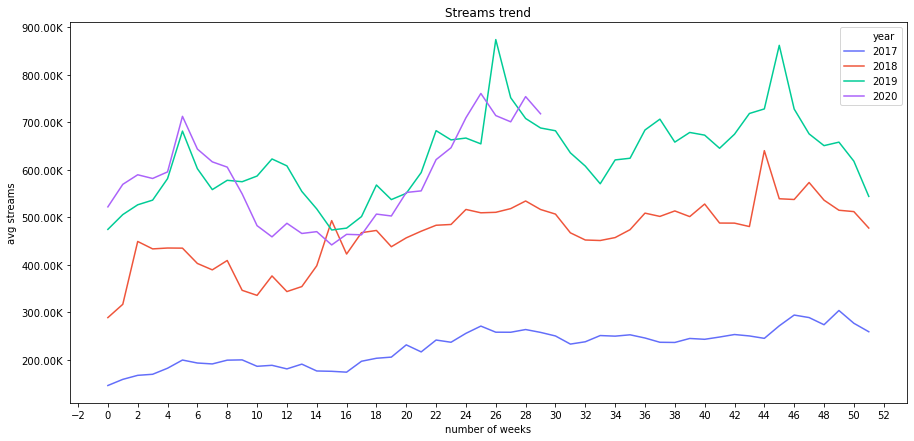

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

fig, ax = plt.subplots(figsize=(15, 7))    
plot=sns.lineplot(ax=ax,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K'))

plot.set(title='Streams trend')
plot.xaxis.set_major_locator(ticker.MultipleLocator(2))


In [87]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.line(df, x="number of weeks", y="avg streams", color='year',  hover_name="date", color_discrete_sequence=px.colors.qualitative.Plotly,)
fig.show()

## Analyzing peaks 
There are some major peaks in the ```avg_streams```. Let's retrieve the top 200 of those weeks.


### 7-14 February 2020 and 8-15 February 2019 peaks 
We retrieve the top 200 of these weeks and analyze it.

In [88]:
import os
import pandas as pd
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file = os.path.join(file_folder,'it_2020-02-07--2020-02-14.csv')
df_week=pd.read_csv(file)

In the following plot we're going to analyze the stream peak in the *7-14 February 2020* as highlighted on the stream trend plot (the upper one).

The two histograms show the number of songs in the top 200 per artist (the one on the left) and the percentage of streams per artist (the one on the right).

The histogram on the left shows a major number of tracks by ***Shiva***. He released the ***Routine*** EP on the **31 January of 2020**. <br>However, the histogram can be misleading. <br>There has indeed been a major release by ***Shiva***  (we will see later how releases impact streams), but in this case it's not the major reason for streams increment. 

In fact, if we analyze the histogram on the right, we can notice that there are many artists who have a good percentage of streams even if their number of tracks in the top 200 is less or equal to three.

Such artists are ***Diodato***, ***Marracash***, ***Fasma***, ***Francesco Gabbani*** and ***Elettra Lamborghini***. 



The Histogram shows also a major presence of ***ThaSupreme***, his presence is given by it's major release in *November 2019*, which guaranteed him a long presence on the top charts (we will analyze his case later)

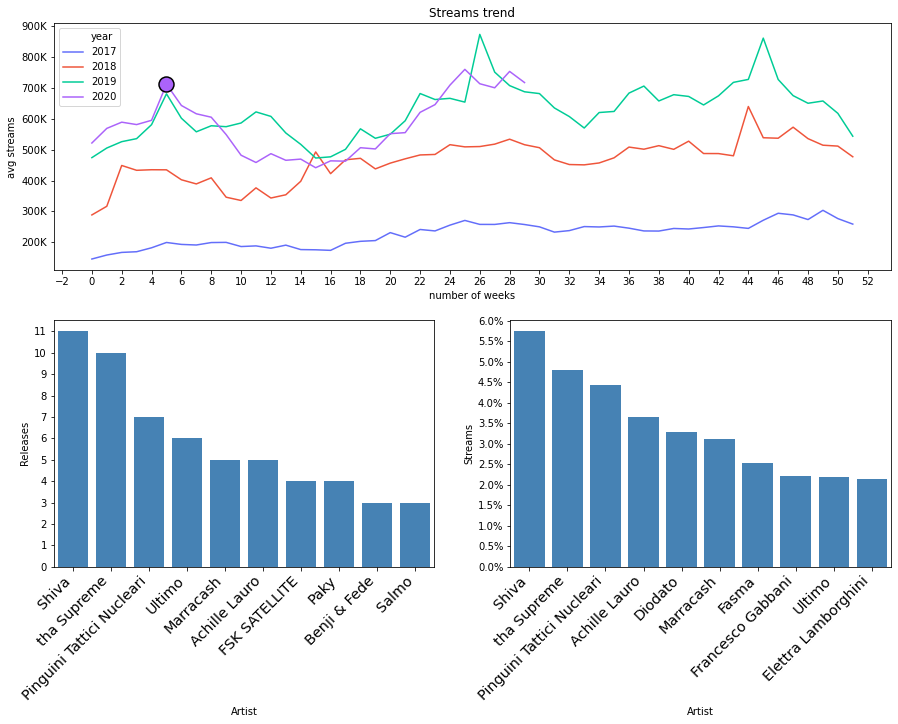

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

artist_entries=df_week['Artist'].value_counts().rename_axis('Artist').to_frame('Releases')
#display(artist_entries)

artist_grouped=df_week.groupby('Artist')['Streams'].sum()
artist_grouped=artist_grouped.sort_values(ascending=False)

total_streams = artist_grouped.sum()
#print(total_streams)


#display(artist_grouped)

result = pd.merge(artist_entries, artist_grouped, on=['Artist'])
result['Streams'] = (result['Streams']/total_streams)*100
result['Artist'] = result.index
#display(result)

#for col in result.columns: 
    #print(col) 

fig = plt.figure(figsize=(15,10))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.2)

ax1 = fig.add_subplot(gs0[0,:])
ax2 = fig.add_subplot(gs0[1,0])
ax3 = fig.add_subplot(gs0[1,1])

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.lineplot(ax=ax1,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)
lines = ax1.get_lines()
line = lines[3]

props = {'marker':'o','markersize':15,'markeredgewidth':1.5,
         'markeredgecolor':'black','markevery': [5]}
line.set(**props)
#use plt.txt() to add label next to the hilighted point

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax1.set(title='Streams trend')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

sort_by_streams = result.sort_values('Streams', ascending=False)

#unique = result["Artist"].head(10).append(sort_by_streams["Artist"].head(10)).unique()
#palette = dict(zip(unique, sns.color_palette("Set1",n_colors=len(unique))))
#palette.update({"Total":"k"})  

    
plot = sns.barplot(x="Artist", y="Releases", data = result.head(10), ax=ax2, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plot.yaxis.set_major_locator(ticker.MultipleLocator(1))

plot=sns.barplot(x="Artist", y="Streams", data = sort_by_streams.head(10), ax=ax3, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1) + '%'))
plot.yaxis.set_major_locator(ticker.MultipleLocator(0.5))


The following result should make ourselves ask: *Why are there some artist like Diodato who have a quite high percentage of streams even if they have three or less tracks in the top 200?*

As we might notice from the following top 10, the first top 8 songs come from **Sanremo Festival**, with ***Diodato*** in first position, which happens to be the winner of **Sanremo 2020**.

In [90]:
df_week.filter(['Track Name','Artist','Streams', 'genre']).head(20)

,Track Name,Artist,Streams,genre
0,Fai rumore,Diodato,4268423,Pop
1,Ringo Starr,Pinguini Tattici Nucleari,3840527,Pop
2,Me ne frego,Achille Lauro,3309741,Hip-Hop/Rap
3,Per sentirmi vivo,Fasma,3192031,Hip-Hop/Rap
4,Viceversa,Francesco Gabbani,3144858,Pop
5,Musica (E Il Resto Scompare),Elettra Lamborghini,3035842,Urbano latino
6,Andromeda,Elodie,2380992,Hip-Hop/Rap
7,Tikibombom,Levante,2215022,Pop
8,blun7 a swishland,tha Supreme,2010716,Hip-Hop/Rap
9,Boogieman (feat. Salmo),Ghali,2001335,Hip-Hop/Rap


In [91]:
#Introdurre normalizzazione sul numero di tracce? Cioè che per ogni artista prendo la percentuale e la spalmo sul numero di tracce nella top 200
# Così da vedere chi ha la percentuale di streams più alta per traccia
# Introdurre filtering sulle canzoni di sanremo e mostrare il loro percentage di streams sul totale? 
result

,Releases,Streams,Artist
Artist,,,
Shiva,11,5.736890,Shiva
tha Supreme,10,4.805235,tha Supreme
Pinguini Tattici Nucleari,7,4.435837,Pinguini Tattici Nucleari
Ultimo,6,2.190847,Ultimo
Marracash,5,3.116466,Marracash
...,...,...,...
Arizona Zervas,1,0.641968,Arizona Zervas
Nicky Jam,1,0.352411,Nicky Jam
Shakira,1,0.304689,Shakira


Now we're going to analyze the same week, but in 2019. We're analyzing the period *8-15 February 2019*

In [92]:
import os
import pandas as pd
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file = os.path.join(file_folder,'it_2019-02-08--2019-02-15.csv')
df_week=pd.read_csv(file)

The histogram on the left shows a major number of tracks by ***Madman***. He released the ***MM Vol.3 Mixtape*** on the **1 February of 2019**. <br>However, if we look at the histogram containing the percentage of streams, we can see that ***Madman*** is only in third position, with ***Ultimo*** and ***Mahmood*** in first and second position respectively.  

***Mahmood*** won the **Sanremo Festival 2019** while ***Ultimo*** ended up taking the second place. 

There has also been a lot of discussion and criticisms about ***Mahmood*** first place. In fact, the favourite winner by the public was ***Ultimo*** with the **48,80%** of votes, while ***Mahmood*** got only the **20,95%** (source: https://www.sorrisi.com/musica/sanremo/sanremo-2019-analisi-del-televoto-e-dati-delle-giuri/).

The technical jury decided to assign the first place to ***Mahmood***, this generated a lot of critisisms and discussion on public media, which guaranteed ***Ultimo*** a huge visibility and streams on Spotify. 



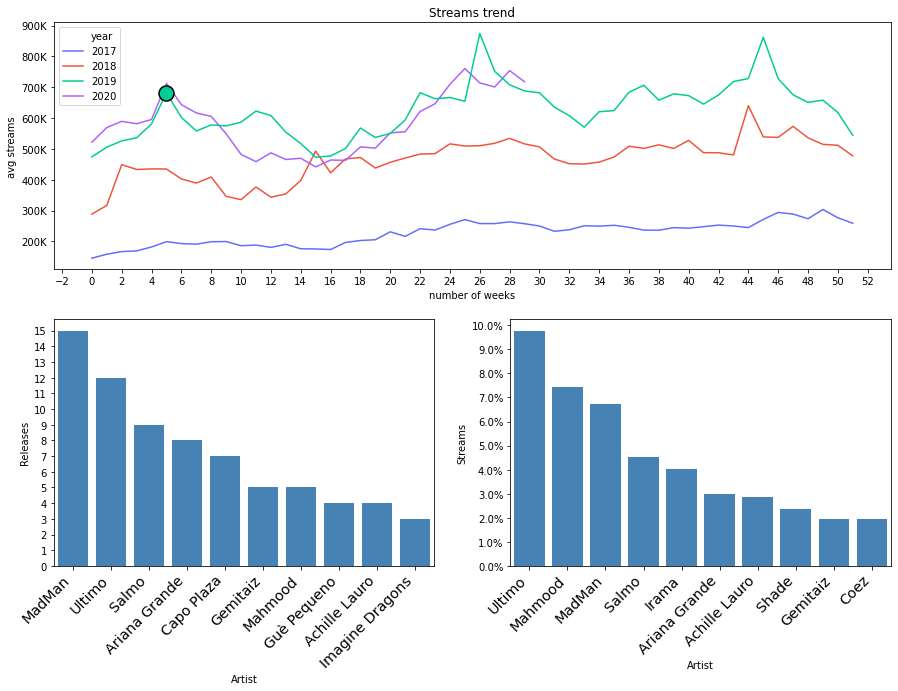

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

artist_entries=df_week['Artist'].value_counts().rename_axis('Artist').to_frame('Releases')
#display(artist_entries)

artist_grouped=df_week.groupby('Artist')['Streams'].sum()
artist_grouped=artist_grouped.sort_values(ascending=False)

total_streams = artist_grouped.sum()
#print(total_streams)


#display(artist_grouped)

result = pd.merge(artist_entries, artist_grouped, on=['Artist'])
result['Streams'] = (result['Streams']/total_streams)*100
result['Artist'] = result.index
#display(result)

#for col in result.columns: 
    #print(col) 

fig = plt.figure(figsize=(15,10))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.2)

ax1 = fig.add_subplot(gs0[0,:])
ax2 = fig.add_subplot(gs0[1,0])
ax3 = fig.add_subplot(gs0[1,1])

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.lineplot(ax=ax1,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)
lines = ax1.get_lines()
line = lines[2]

props = {'marker':'o','markersize':15,'markeredgewidth':1.5,
         'markeredgecolor':'black','markevery': [5], 'zorder': 10}
line.set(**props)
#use plt.txt() to add label next to the hilighted point

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax1.set(title='Streams trend')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

sort_by_streams = result.sort_values('Streams', ascending=False)

#unique = result["Artist"].head(10).append(sort_by_streams["Artist"].head(10)).unique()
#palette = dict(zip(unique, sns.color_palette("Set1",n_colors=len(unique))))
#palette.update({"Total":"k"})  

    
plot = sns.barplot(x="Artist", y="Releases", data = result.head(10), ax=ax2, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plot.yaxis.set_major_locator(ticker.MultipleLocator(1))

plot=sns.barplot(x="Artist", y="Streams", data = sort_by_streams.head(10), ax=ax3, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1) + '%'))
plot.yaxis.set_major_locator(ticker.MultipleLocator(1))


If we plot the top 200 weekly dataset, we can notice that, out of the top 10 songs, 6 of them are from *Sanremo Festival*. 

In [94]:
df_week.filter(['Track Name','Artist','Streams', 'genre']).head(10)


,Track Name,Artist,Streams,genre
0,Soldi,Mahmood,8223614,Pop
1,I Tuoi Particolari,Ultimo,5902025,Pop
2,La ragazza con il cuore di latta,Irama,4458947,Pop
3,Senza farlo apposta,Shade,2919684,Hip-Hop/Rap
4,Rolls Royce (feat. Boss Doms & Frenetik&Orang3),Achille Lauro,2848988,Hip-Hop/Rap
5,Per Un Milione,Boomdabash,2456164,Pop
6,È sempre bello,Coez,2216325,Pop
7,IL CIELO NELLA STANZA (feat. NSTASIA),Salmo,2001997,Hip-Hop/Rap
8,Sweet but Psycho,Ava Max,1884427,Pop
9,Calma - Remix,Pedro Capó,1859418,Pop Latino


#### Correlation between musical events and Spotify streams
We noticed how the spike in *February* in *Italy* is generally given by the combination of **new releases** and **Sanremo Festival**. This already gives us some information: there's a correlation between musical events (festival, awards ecc...) and streams trend.

### 22-29 March 2019 minor peak 
We analyze a minor peak in the stream trends.

In [95]:
import os
import pandas as pd
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file = os.path.join(file_folder,'it_2019-03-22--2019-03-29.csv')
df_week=pd.read_csv(file)

As we might notice, ***Rkomi*** is the artist with the highest number of tracks in the top 200 weekly and the most streamed artist of the week. He released his new album ***Dove gli occhi non arrivano*** on the *22-03-2019*.

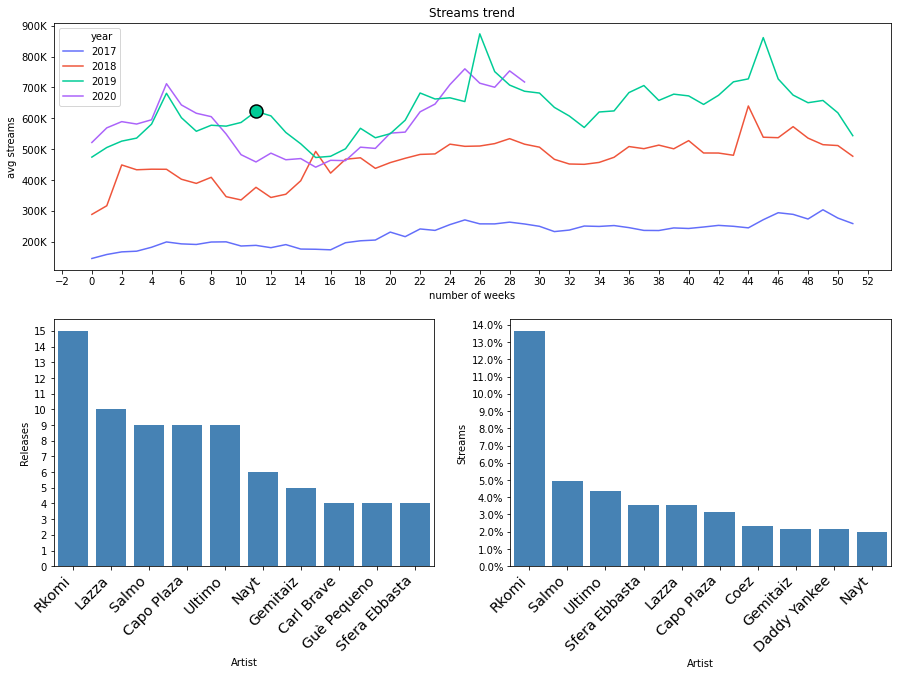

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

artist_entries=df_week['Artist'].value_counts().rename_axis('Artist').to_frame('Releases')
#display(artist_entries)

artist_grouped=df_week.groupby('Artist')['Streams'].sum()
artist_grouped=artist_grouped.sort_values(ascending=False)

total_streams = artist_grouped.sum()
#print(total_streams)


#display(artist_grouped)

result = pd.merge(artist_entries, artist_grouped, on=['Artist'])
result['Streams'] = (result['Streams']/total_streams)*100
result['Artist'] = result.index
#display(result)

#for col in result.columns: 
    #print(col) 

fig = plt.figure(figsize=(15,10))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.2)

ax1 = fig.add_subplot(gs0[0,:])
ax2 = fig.add_subplot(gs0[1,0])
ax3 = fig.add_subplot(gs0[1,1])

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.lineplot(ax=ax1,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)
lines = ax1.get_lines()
line = lines[2]

props = {'marker':'o','markersize':13,'markeredgewidth':1.5,
         'markeredgecolor':'black','markevery': [11], 'zorder': 10}
line.set(**props)
#use plt.txt() to add label next to the hilighted point

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax1.set(title='Streams trend')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

sort_by_streams = result.sort_values('Streams', ascending=False)

#unique = result["Artist"].head(10).append(sort_by_streams["Artist"].head(10)).unique()
#palette = dict(zip(unique, sns.color_palette("Set1",n_colors=len(unique))))
#palette.update({"Total":"k"})  

    
plot = sns.barplot(x="Artist", y="Releases", data = result.head(10), ax=ax2, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plot.yaxis.set_major_locator(ticker.MultipleLocator(1))

plot=sns.barplot(x="Artist", y="Streams", data = sort_by_streams.head(10), ax=ax3, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1) + '%'))
plot.yaxis.set_major_locator(ticker.MultipleLocator(1))


### 5 - 12 July 2019
We can notice a huge spike in the number of streams on this week.

In [97]:
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file = os.path.join(file_folder,'it_2019-07-05--2019-07-12.csv')
df_week=pd.read_csv(file)

We can notice there's a big number of track from ***MACHETE***. In fact on the 5 july 2019 the ***MACHETE Mixtape 4*** has been released, which had a huge success, with major collaborations between big rappers in the italian music scene.

Also, more than the **30%** of the weekly streams are given by ***MACHETE***. 

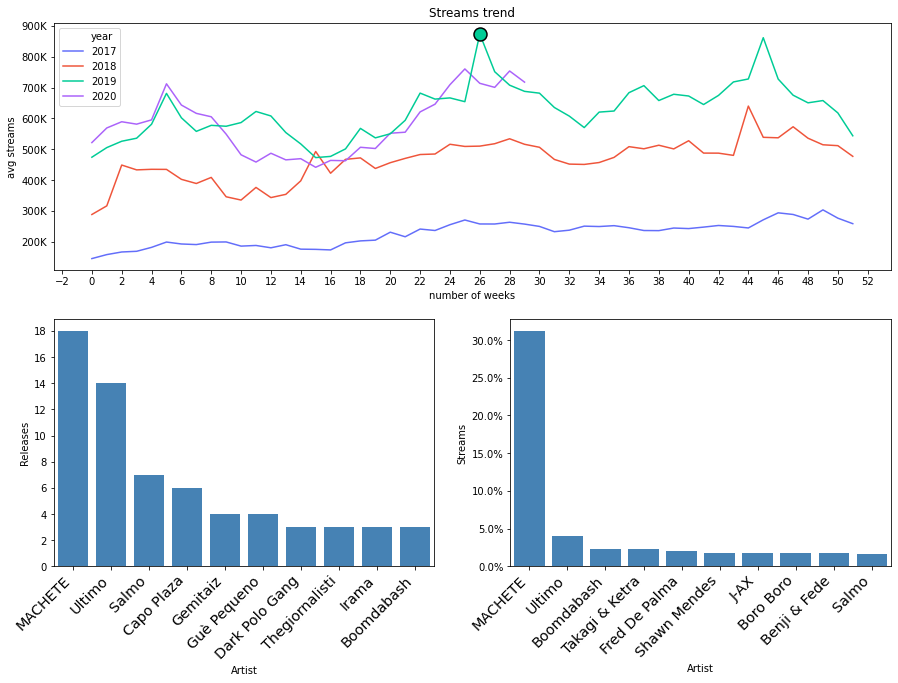

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

artist_entries=df_week['Artist'].value_counts().rename_axis('Artist').to_frame('Releases')
#display(artist_entries)

artist_grouped=df_week.groupby('Artist')['Streams'].sum()
artist_grouped=artist_grouped.sort_values(ascending=False)

total_streams = artist_grouped.sum()
#print(total_streams)


#display(artist_grouped)

result = pd.merge(artist_entries, artist_grouped, on=['Artist'])
result['Streams'] = (result['Streams']/total_streams)*100
result['Artist'] = result.index
#display(result)

#for col in result.columns: 
    #print(col) 

fig = plt.figure(figsize=(15,10))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.2)

ax1 = fig.add_subplot(gs0[0,:])
ax2 = fig.add_subplot(gs0[1,0])
ax3 = fig.add_subplot(gs0[1,1])

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.lineplot(ax=ax1,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)
lines = ax1.get_lines()
line = lines[2]

props = {'marker':'o','markersize':13,'markeredgewidth':1.5,
         'markeredgecolor':'black','markevery': [26], 'zorder': 10}
line.set(**props)
#use plt.txt() to add label next to the hilighted point

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax1.set(title='Streams trend')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

sort_by_streams = result.sort_values('Streams', ascending=False)

#unique = result["Artist"].head(10).append(sort_by_streams["Artist"].head(10)).unique()
#palette = dict(zip(unique, sns.color_palette("Set1",n_colors=len(unique))))
#palette.update({"Total":"k"})  

    
plot = sns.barplot(x="Artist", y="Releases", data = result.head(10), ax=ax2, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plot.yaxis.set_major_locator(ticker.MultipleLocator(2))

plot=sns.barplot(x="Artist", y="Streams", data = sort_by_streams.head(10), ax=ax3, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1) + '%'))
plot.yaxis.set_major_locator(ticker.MultipleLocator(5))


We can also notice that almost the whole top 10 comes from that album.

In [99]:
df_week.filter(['Track Name','Artist','Streams']).head(10)

,Track Name,Artist,Streams
0,YOSHI (feat. Fabri Fibra) - prod. Strage,MACHETE,5816357
1,HO PAURA DI USCIRE 2 - prod. Mace,MACHETE,5489578
2,MARYLEAN (feat. Marracash) - prod. Low Kidd,MACHETE,4829415
3,STAR WARS - prod. Young Miles - Crookers x Nic...,MACHETE,4098318
4,MAMMASTOMALE (feat. Salmo) - prod. Dade,MACHETE,3680698
5,NO WAY (feat. Nitro) - prod. Low Kidd,MACHETE,3555978
6,IO PUO' (feat. Salmo) - prod. Low Kidd,MACHETE,3094979
7,Una volta ancora (feat. Ana Mena),Fred De Palma,3056237
8,JAMBO,Takagi & Ketra,3054732
9,Dove e quando,Benji & Fede,3008972


### 15-22 November 2019 

In [100]:
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file = os.path.join(file_folder,'it_2019-11-15--2019-11-22.csv')
df_week=pd.read_csv(file)

In the left histogram we can notice 20 songs from ***Tha Supreme***. He released highly anticipated debut album ***236451*** on the *15 November 2019*, which had a huge success. <br>
Almost the **35%** of the weekly top 200 streams has been generated by ***Tha Supreme*** followed by ***Marracash*** who release his album ***Persona*** the previous week.

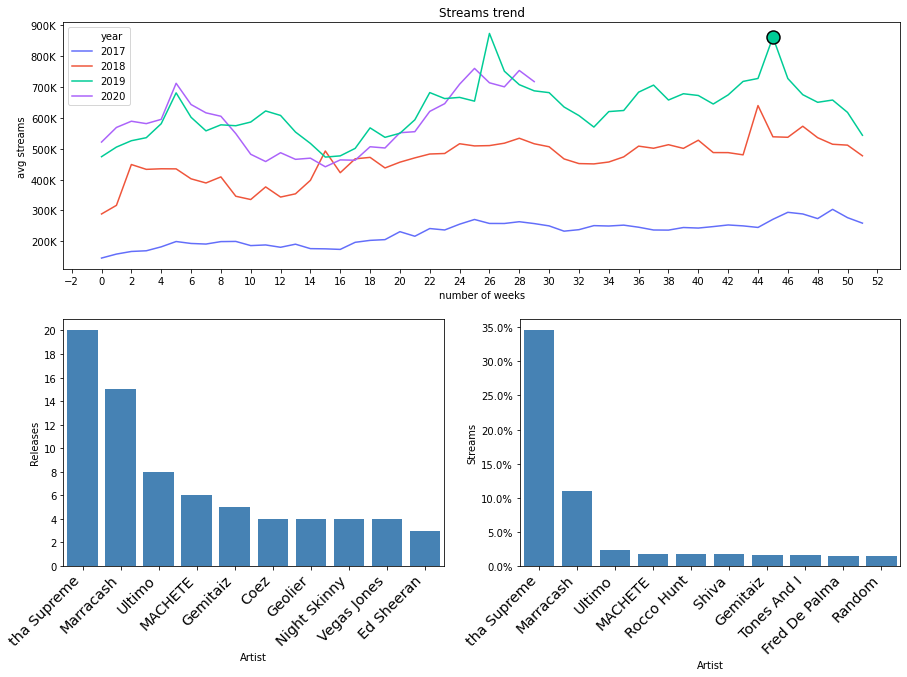

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

artist_entries=df_week['Artist'].value_counts().rename_axis('Artist').to_frame('Releases')
#display(artist_entries)

artist_grouped=df_week.groupby('Artist')['Streams'].sum()
artist_grouped=artist_grouped.sort_values(ascending=False)

total_streams = artist_grouped.sum()
#print(total_streams)


#display(artist_grouped)

result = pd.merge(artist_entries, artist_grouped, on=['Artist'])
result['Streams'] = (result['Streams']/total_streams)*100
result['Artist'] = result.index
#display(result)

#for col in result.columns: 
    #print(col) 

fig = plt.figure(figsize=(15,10))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.2)

ax1 = fig.add_subplot(gs0[0,:])
ax2 = fig.add_subplot(gs0[1,0])
ax3 = fig.add_subplot(gs0[1,1])

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.lineplot(ax=ax1,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)
lines = ax1.get_lines()
line = lines[2]

props = {'marker':'o','markersize':13,'markeredgewidth':1.5,
         'markeredgecolor':'black','markevery': [45], 'zorder': 10}
line.set(**props)
#use plt.txt() to add label next to the hilighted point

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax1.set(title='Streams trend')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

sort_by_streams = result.sort_values('Streams', ascending=False)

#unique = result["Artist"].head(10).append(sort_by_streams["Artist"].head(10)).unique()
#palette = dict(zip(unique, sns.color_palette("Set1",n_colors=len(unique))))
#palette.update({"Total":"k"})  

    
plot = sns.barplot(x="Artist", y="Releases", data = result.head(10), ax=ax2, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plot.yaxis.set_major_locator(ticker.MultipleLocator(2))

plot=sns.barplot(x="Artist", y="Streams", data = sort_by_streams.head(10), ax=ax3, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1) + '%'))
plot.yaxis.set_major_locator(ticker.MultipleLocator(5))


As we can see, basically the whole top 10 is by ***Tha Supreme***

In [102]:
df_week.filter(['Track Name','Artist','Streams']).head(10)

,Track Name,Artist,Streams
0,blun7 a swishland,tha Supreme,7429539
1,fuck 3x,tha Supreme,4668644
2,sw1n6o - feat. Salmo,tha Supreme,3954844
3,m12ano - feat. Mara Sattei,tha Supreme,3555240
4,SUPREME - L'ego (feat. tha Supreme & Sfera Ebb...,Marracash,3381296
5,occh1 purpl3 - feat. Marracash,tha Supreme,3329403
6,no14 - feat. Dani Faiv,tha Supreme,3081602
7,come fa1,tha Supreme,3019409
8,ch1 5ei te,tha Supreme,3012034
9,2ollipop,tha Supreme,2901181


As we already mentioned, ***Marracash*** released his album ***Persona*** the previous week, on the *31 October 2019*.

His release has been pretty much unexpected (after a long period of silence and no big marketing actions) so that's probably the main reason of the lack of a big peak in the number of streams in that week. 

***Tha Supreme*** released his debut album the following week, his debut has been anticipated by a huge marketing campaign, includin a 4 meters tall statue of himself placed in the main train stations of Italy. His highly anticipated album and the generated hype could be the cause of the "ecplipse" of the ***Marracash*** release. 

In [103]:
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file = os.path.join(file_folder,'it_2019-11-08--2019-11-15.csv')
df_week=pd.read_csv(file)

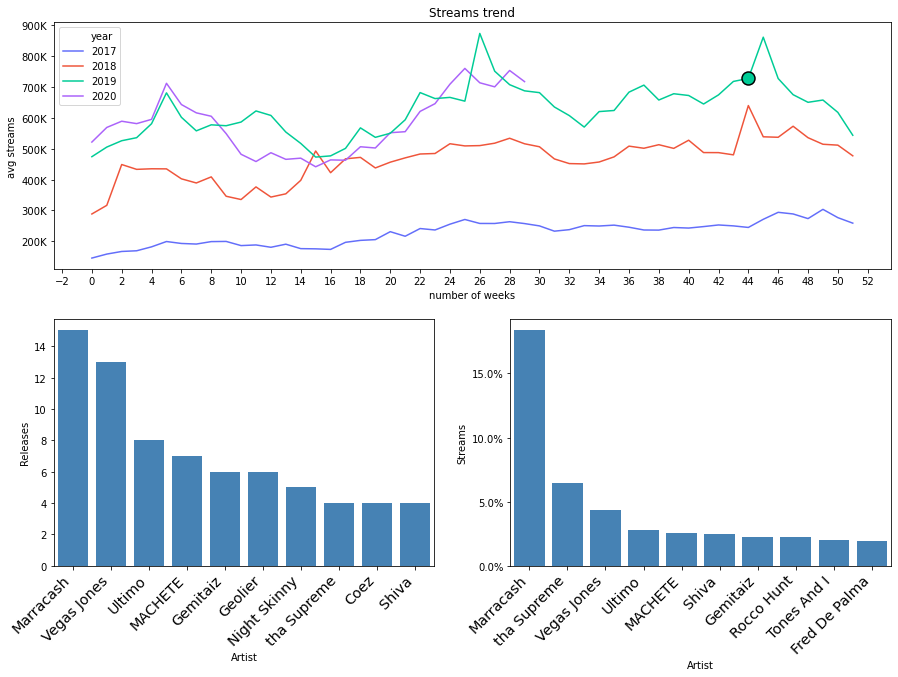

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

artist_entries=df_week['Artist'].value_counts().rename_axis('Artist').to_frame('Releases')
#display(artist_entries)

artist_grouped=df_week.groupby('Artist')['Streams'].sum()
artist_grouped=artist_grouped.sort_values(ascending=False)

total_streams = artist_grouped.sum()
#print(total_streams)


#display(artist_grouped)

result = pd.merge(artist_entries, artist_grouped, on=['Artist'])
result['Streams'] = (result['Streams']/total_streams)*100
result['Artist'] = result.index
#display(result)

#for col in result.columns: 
    #print(col) 

fig = plt.figure(figsize=(15,10))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.2)

ax1 = fig.add_subplot(gs0[0,:])
ax2 = fig.add_subplot(gs0[1,0])
ax3 = fig.add_subplot(gs0[1,1])

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.lineplot(ax=ax1,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)
lines = ax1.get_lines()
line = lines[2]

props = {'marker':'o','markersize':13,'markeredgewidth':1.5,
         'markeredgecolor':'black','markevery': [44], 'zorder': 10}
line.set(**props)
#use plt.txt() to add label next to the hilighted point

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax1.set(title='Streams trend')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

sort_by_streams = result.sort_values('Streams', ascending=False)

#unique = result["Artist"].head(10).append(sort_by_streams["Artist"].head(10)).unique()
#palette = dict(zip(unique, sns.color_palette("Set1",n_colors=len(unique))))
#palette.update({"Total":"k"})  

    
plot = sns.barplot(x="Artist", y="Releases", data = result.head(10), ax=ax2, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plot.yaxis.set_major_locator(ticker.MultipleLocator(2))

plot=sns.barplot(x="Artist", y="Streams", data = sort_by_streams.head(10), ax=ax3, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1) + '%'))
plot.yaxis.set_major_locator(ticker.MultipleLocator(5))


As we can notice from the left histogram, ***Tha Supreme*** about **6%** of the weekly top 200 streams with only a song ***blun7 a swishland*** which placed in the first place of the top 200.

In [105]:
df_week.filter(['Track Name','Artist','Streams']).head(10)

,Track Name,Artist,Streams
0,blun7 a swishland,tha Supreme,7271621
1,SUPREME - L'ego (feat. tha Supreme & Sfera Ebb...,Marracash,4587655
2,CRUDELIA - I nervi,Marracash,3404344
3,Dance Monkey,Tones And I,2961298
4,Ti volevo dedicare (feat. J-AX & Boomdabash),Rocco Hunt,2331568
5,RITMO (Bad Boys For Life),Black Eyed Peas,2029192
6,MADAME - L'anima (feat. Madame),Marracash,1981428
7,Pookie (feat. Capo Plaza) - Remix,Aya Nakamura,1977101
8,APPARTENGO - Il sangue (feat. Massimo Pericolo),Marracash,1866278
9,QUELLI CHE NON PENSANO - Il cervello (feat. Coez),Marracash,1851360


### 9-16 november 2018


In [106]:
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file = os.path.join(file_folder,'it_2018-11-09--2018-11-16.csv')
df_week=pd.read_csv(file)

15 tracks by ***Salmo*** are present in the top 200. In fact his album ***Playlist*** has been released on the *9 November 2018*

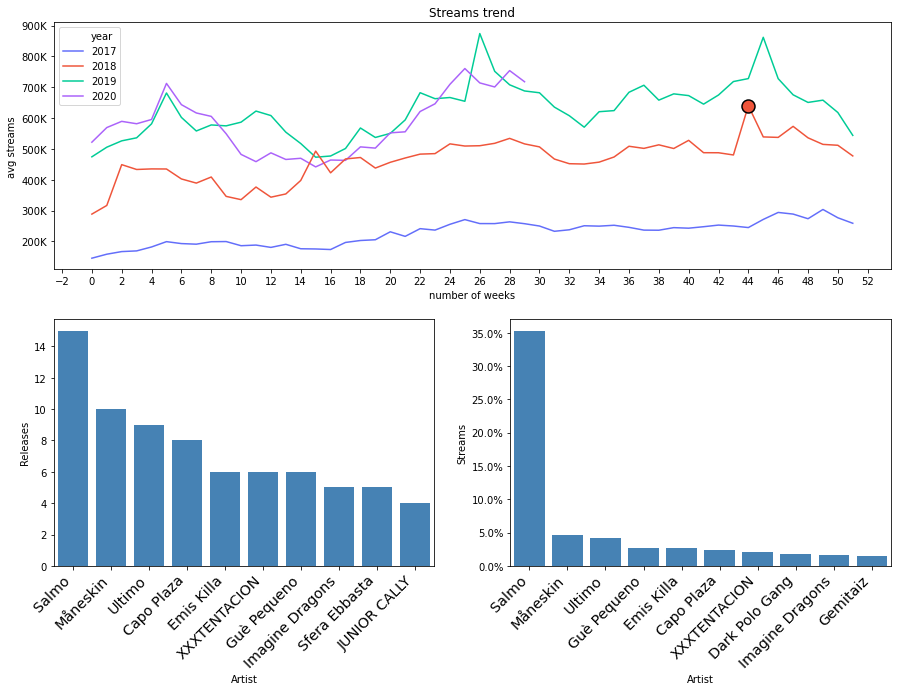

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

artist_entries=df_week['Artist'].value_counts().rename_axis('Artist').to_frame('Releases')
#display(artist_entries)

artist_grouped=df_week.groupby('Artist')['Streams'].sum()
artist_grouped=artist_grouped.sort_values(ascending=False)

total_streams = artist_grouped.sum()
#print(total_streams)


#display(artist_grouped)

result = pd.merge(artist_entries, artist_grouped, on=['Artist'])
result['Streams'] = (result['Streams']/total_streams)*100
result['Artist'] = result.index
#display(result)

#for col in result.columns: 
    #print(col) 

fig = plt.figure(figsize=(15,10))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.2)

ax1 = fig.add_subplot(gs0[0,:])
ax2 = fig.add_subplot(gs0[1,0])
ax3 = fig.add_subplot(gs0[1,1])

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.lineplot(ax=ax1,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)
lines = ax1.get_lines()
line = lines[1]

props = {'marker':'o','markersize':13,'markeredgewidth':1.5,
         'markeredgecolor':'black','markevery': [44], 'zorder': 10}
line.set(**props)
#use plt.txt() to add label next to the hilighted point

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax1.set(title='Streams trend')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

sort_by_streams = result.sort_values('Streams', ascending=False)

#unique = result["Artist"].head(10).append(sort_by_streams["Artist"].head(10)).unique()
#palette = dict(zip(unique, sns.color_palette("Set1",n_colors=len(unique))))
#palette.update({"Total":"k"})  

    
plot = sns.barplot(x="Artist", y="Releases", data = result.head(10), ax=ax2, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plot.yaxis.set_major_locator(ticker.MultipleLocator(2))

plot=sns.barplot(x="Artist", y="Streams", data = sort_by_streams.head(10), ax=ax3, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1) + '%'))
plot.yaxis.set_major_locator(ticker.MultipleLocator(5))


We can easily see that almost the whole top 10 is taken by ***Salmo***.

In [108]:
df_week.filter(['Track Name','Artist','Streams']).head(10)

,Track Name,Artist,Streams
0,CABRIOLET (feat. Sfera Ebbasta),Salmo,5434298
1,STAI ZITTO (feat. Fabri Fibra),Salmo,5195708
2,IL CIELO NELLA STANZA (feat. NSTASIA),Salmo,5163645
3,LUNEDI',Salmo,3859383
4,HO PAURA DI USCIRE,Salmo,3493788
5,SPARARE ALLA LUNA (feat. Coez),Salmo,3475966
6,RICCHI E MORTI,Salmo,3390260
7,90MIN,Salmo,3216286
8,DISPOVERY CHANNEL (feat. Nitro),Salmo,3118643
9,Torna a casa,Måneskin,2797833


### 19-26 January 2018


In [109]:
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file = os.path.join(file_folder,'it_2018-01-19--2018-01-26.csv')
df_week=pd.read_csv(file)

We can easily spot 18 tracks by ***Sfera Ebbasta***. He released his album ***Rockstar*** on the *19 Janruary 2018*, which has been a huge success in the italian trap scene.

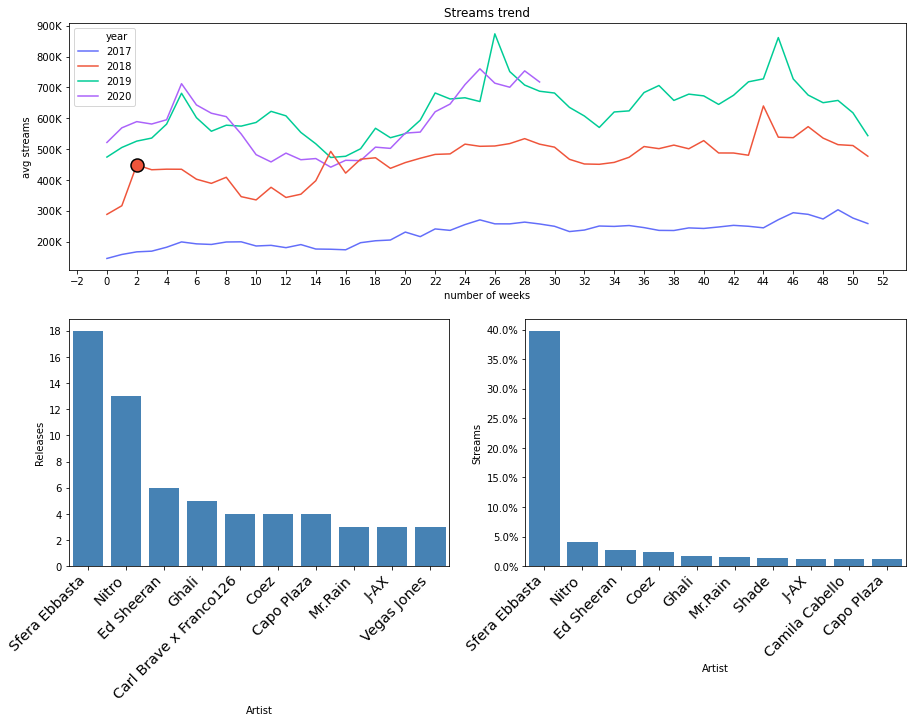

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

artist_entries=df_week['Artist'].value_counts().rename_axis('Artist').to_frame('Releases')
#display(artist_entries)

artist_grouped=df_week.groupby('Artist')['Streams'].sum()
artist_grouped=artist_grouped.sort_values(ascending=False)

total_streams = artist_grouped.sum()
#print(total_streams)


#display(artist_grouped)

result = pd.merge(artist_entries, artist_grouped, on=['Artist'])
result['Streams'] = (result['Streams']/total_streams)*100
result['Artist'] = result.index
#display(result)

#for col in result.columns: 
    #print(col) 

fig = plt.figure(figsize=(15,10))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.2)

ax1 = fig.add_subplot(gs0[0,:])
ax2 = fig.add_subplot(gs0[1,0])
ax3 = fig.add_subplot(gs0[1,1])

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.lineplot(ax=ax1,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)
lines = ax1.get_lines()
line = lines[1]

props = {'marker':'o','markersize':13,'markeredgewidth':1.5,
         'markeredgecolor':'black','markevery': [2], 'zorder': 10}
line.set(**props)
#use plt.txt() to add label next to the hilighted point

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax1.set(title='Streams trend')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

sort_by_streams = result.sort_values('Streams', ascending=False)

#unique = result["Artist"].head(10).append(sort_by_streams["Artist"].head(10)).unique()
#palette = dict(zip(unique, sns.color_palette("Set1",n_colors=len(unique))))
#palette.update({"Total":"k"})  

    
plot = sns.barplot(x="Artist", y="Releases", data = result.head(10), ax=ax2, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plot.yaxis.set_major_locator(ticker.MultipleLocator(2))

plot=sns.barplot(x="Artist", y="Streams", data = sort_by_streams.head(10), ax=ax3, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1) + '%'))
plot.yaxis.set_major_locator(ticker.MultipleLocator(5))


The whole top 10 is taken by ***Sfera Ebbasta***.

In [111]:
df_week.filter(['Track Name','Artist','Streams']).head(10)

,Track Name,Artist,Streams
0,Cupido (feat. Quavo),Sfera Ebbasta,5105410
1,Rockstar,Sfera Ebbasta,4722530
2,Sciroppo (feat. DrefGold),Sfera Ebbasta,4156428
3,Ricchi x Sempre,Sfera Ebbasta,3552712
4,Serpenti A Sonagli,Sfera Ebbasta,3381143
5,Uber,Sfera Ebbasta,2894123
6,XNX,Sfera Ebbasta,2552249
7,Leggenda,Sfera Ebbasta,2216057
8,20 Collane,Sfera Ebbasta,2071546
9,Bancomat,Sfera Ebbasta,2051597


### 20-27 April 2018

In [112]:
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file = os.path.join(file_folder,'it_2018-04-20--2018-04-27.csv')
df_week=pd.read_csv(file)

***Capo Plaza*** and ***Gemitaiz*** have the highest number of tracks in the top 200. ***Capo Plaza*** released his debut album ***20*** on the *20 April 2018*, on the same day ***Gemitaiz*** released his album ***Davide***.

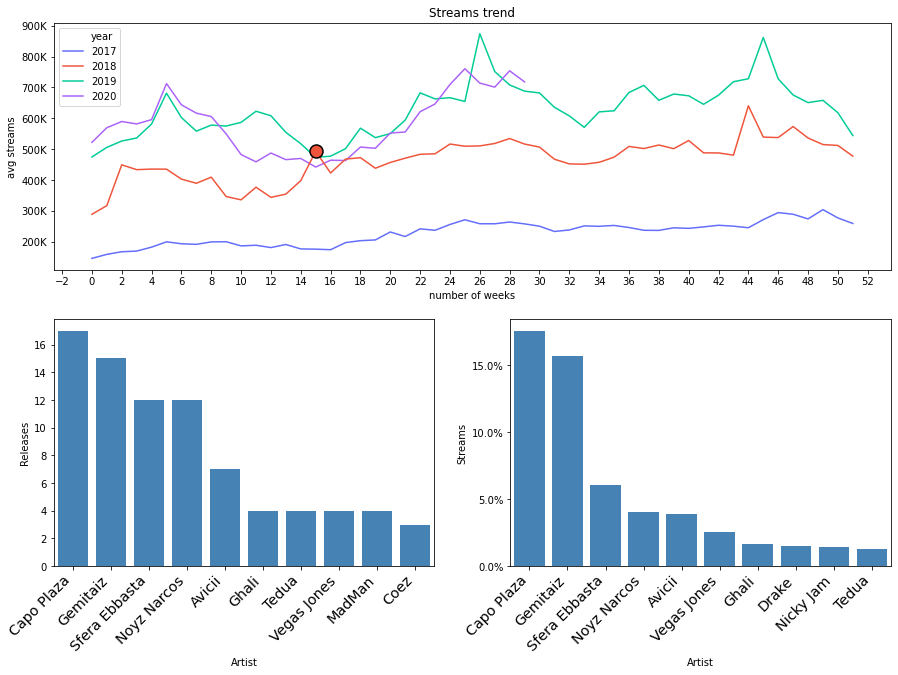

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

artist_entries=df_week['Artist'].value_counts().rename_axis('Artist').to_frame('Releases')
#display(artist_entries)

artist_grouped=df_week.groupby('Artist')['Streams'].sum()
artist_grouped=artist_grouped.sort_values(ascending=False)

total_streams = artist_grouped.sum()
#print(total_streams)


#display(artist_grouped)

result = pd.merge(artist_entries, artist_grouped, on=['Artist'])
result['Streams'] = (result['Streams']/total_streams)*100
result['Artist'] = result.index
#display(result)

#for col in result.columns: 
    #print(col) 

fig = plt.figure(figsize=(15,10))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.2)

ax1 = fig.add_subplot(gs0[0,:])
ax2 = fig.add_subplot(gs0[1,0])
ax3 = fig.add_subplot(gs0[1,1])

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

sns.lineplot(ax=ax1,x="number of weeks", y="avg streams", hue="year", data=df, palette=flatui)
lines = ax1.get_lines()
line = lines[1]

props = {'marker':'o','markersize':13,'markeredgewidth':1.5,
         'markeredgecolor':'black','markevery': [15], 'zorder': 10}
line.set(**props)
#use plt.txt() to add label next to the hilighted point

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax1.set(title='Streams trend')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

sort_by_streams = result.sort_values('Streams', ascending=False)

#unique = result["Artist"].head(10).append(sort_by_streams["Artist"].head(10)).unique()
#palette = dict(zip(unique, sns.color_palette("Set1",n_colors=len(unique))))
#palette.update({"Total":"k"})  

    
plot = sns.barplot(x="Artist", y="Releases", data = result.head(10), ax=ax2, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plot.yaxis.set_major_locator(ticker.MultipleLocator(2))

plot=sns.barplot(x="Artist", y="Streams", data = sort_by_streams.head(10), ax=ax3, color="steelblue", saturation=1)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1) + '%'))
plot.yaxis.set_major_locator(ticker.MultipleLocator(5))


As we can see, there's a major presence of ***Capo Plaza*** and ***Gemitaiz*** in the top 20. 

In [114]:
df_week.filter(['Track Name','Artist','Streams']).head(20)

,Track Name,Artist,Streams
0,Tesla (feat. Sfera Ebbasta & DrefGold),Capo Plaza,4005577
1,Davide (feat. Coez),Gemitaiz,2503221
2,Ne è valsa la pena (feat. Ghali),Capo Plaza,1754269
3,Malibu,Vegas Jones,1658260
4,Non cambierò mai,Capo Plaza,1544702
5,X,Nicky Jam,1401289
6,Keanu Reeves (feat. Achille Lauro),Gemitaiz,1252954
7,Holy Grail (feat. Madman),Gemitaiz,1229975
8,Paradise Lost,Gemitaiz,1225081
9,Pezzo Trap (feat. Fabri Fibra),Gemitaiz,1173530


## Releases and events impact number of streams

We noticed that there's a correlation between the number of streams on Spotify and major releases/musical events. <br>
This correlation is more evident in the last years, where the Spotify "joined" the every day use of users: in 2017 and beginning 2018 the service was still on the rise, as we can see by the constant increasing of the number of streams.

Limited to Italy, the majority of spikes were given by italian artists in the genre of **Hip-Hop/Rap/Trap**.

We also saw a decreasing trend in the number of streams during quarantine/pandemic.
<br> Considering the previous results, one should naturally ask himself: "*Is this decreasing trend caused directly by the pandemic, or is it caused by the lack of new releases and musical events?*" 

We're going to analyze the number of releases in the pandemic period and compare it with the number of releases in the same period of different years. And also analyze the number of streams normalized on the number of new releases.


# Analysis of new releases 

Now we're going to analyze the number of streams with respect to the number of new releases during the quarantine period.

First, we build a temporary dataframe from our dataset, basically we're creating a single dataframe from our .csv files.<br> We're also adding 2 fields containing the ```year``` and the ```date``` of the song. <br>Our dataset already contains this informations, but they are inserted in the .csv file name, we're inserting these extra informations in our dataframe in order to distinguish the data once it has been aggregated in a single dataframe.

In [115]:
import os
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
years = [2017,2018,2019,2020]
list_data= []
df = pd.DataFrame(list_data,columns = ["danceability","energy","loudness","tempo","valence","acousticness","date","year","number_of_weeks", "release date"])

for year in years:
    number_of_weeks = 0
    for csv_file in os.listdir(file_folder):
        if str(year) in csv_file[:13]:
            short_name = csv_file[:13]
            #print(csv_file[:13])
            csv_path = os.path.join(file_folder,csv_file)
            df_temp = pd.read_csv(csv_path)
            df_temp=df_temp.filter(["danceability","energy","loudness","tempo","valence", "acousticness", "release date"])
            #display(df_temp)
            #avg_streams = df_temp["Streams"].sum()
            #print(avg_streams)
            week = short_name[-2:]
            month =short_name[8:10]
            date = month + '-' + week
            temp = [date,year,number_of_weeks]
            df_temp['date'] = date
            df_temp['year'] = year
            df_temp['number_of_weeks'] = number_of_weeks
            #display(df_temp)
            frames = [df,df_temp]
            df = pd.concat(frames)
            number_of_weeks=number_of_weeks+1
#print(list_data)
            
            
            
            

            
    
    
    

In [116]:
df

,danceability,energy,loudness,tempo,valence,acousticness,date,year,number_of_weeks,release date
0,0.825,0.652,-3.183,95.977,0.931,0.5810,01-06,2017,0,2017-03-03
1,0.720,0.763,-4.068,101.965,0.742,0.4060,01-06,2017,0,2016-10-21
2,0.461,0.834,-4.868,135.007,0.471,0.0232,01-06,2017,0,2017-03-03
3,0.748,0.524,-5.599,95.010,0.661,0.4140,01-06,2017,0,2016-07-29
4,0.554,0.640,-7.587,160.009,0.641,0.3410,01-06,2017,0,2017-01-20
...,...,...,...,...,...,...,...,...,...,...
195,0.417,0.625,-6.055,143.358,0.144,0.2180,07-24,2020,29,2020-05-22
196,0.827,0.697,-4.368,118.083,0.836,0.1220,07-24,2020,29,2018-06-01
197,0.477,0.755,-5.781,81.283,0.586,0.0351,07-24,2020,29,2020-05-29
198,0.841,0.620,-6.910,98.023,0.519,0.0584,07-24,2020,29,2019-10-25


Now we're going to plot the release trend over the whole year for all the years. So i need to retrieve the number of releases for each week. <br> In the following cell we're creating a single dataframe with the following fields:
1. ```year```: year of the considered top 200
2. ```week```: number of weeks from the beginning of the year
3. ```date```: the actual date of the week in month-day format
4. ```number of releases```: total number of new releases in the considered week

In [117]:
#Outputs a dataframe with the number of releases in each week 
df_trend_releases = df.filter(items=['year','number_of_weeks', 'date', 'release date'])

import datetime
date_format = "%Y-%m-%d"
years=[2017,2018,2019,2020]
data = []

for year in years:
    current_year = df_trend_releases.loc[df_trend_releases['year'] == year]
    weeks = current_year['number_of_weeks'].unique()
    #print(weeks)
    #print(weeks)
    for week in weeks:
        current_week = current_year.loc[current_year['number_of_weeks'] == week]
        #display(current_week)
        lower_date = str(year)+'-'+ current_week['date'][0]
        #print(lower_date)
        
        d0 = datetime.datetime.strptime(lower_date, date_format).date()
        d1 = d0+datetime.timedelta(days=7)
        #print()
        #print(str(d0) + str(d1))
        number_of_releases=0
        
        for index, row in current_week.iterrows():
            #print(index)
            date = row["release date"]
            #print(date)
            try:
                date=datetime.datetime.strptime(date, '%Y-%m-%d').date()
                if d0 <= date < d1:
                    #print('in between')
                    number_of_releases=number_of_releases+1
            except ValueError:
                #print('Incorrect format ' + str(date))
                pass
                
        temp = [current_week['date'][0],year,week,number_of_releases]
        data.append(temp)
        #print(data)


#print(data)       
    
    

    


In the following table we have the total number of release for each year in the period from the **6th of March** to the **15th of May** which corresponds to the weeks of beginning and ending of the lockdown in Italy respectively (sources= http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4184 and https://www.rainews.it/dl/rainews/articoli/coronavirus-Fase-2-ecco-come-si-riparte-il-18-maggio-6a0c52c3-2f99-4170-95de-e6d221e7ff21.html )

As we can see in the plot, we have an increasing trend in the number of releases in the different years which drops in 2020.

In [118]:
releases_dataframe = pd.DataFrame(data, columns=['date','year','week','number of releases'])
releases_dataframe = releases_dataframe[releases_dataframe['week'].between(9, 19)]
releases_dataframe.groupby('year').sum()

,week,number of releases
year,,
2017,154,122
2018,154,173
2019,154,184
2020,154,92


The following plot shows the number of new releases in the period from **03-06** to **05-15** for each year. 

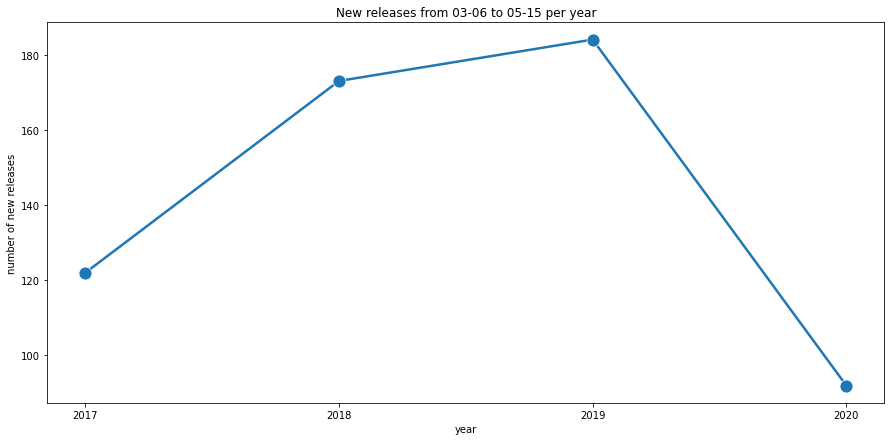

In [119]:
import matplotlib.ticker as ticker

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

fig, ax = plt.subplots(figsize=(15, 7))  
ax = sns.lineplot(x="year", y="number of releases", data=releases_dataframe, marker='o', markersize=13, estimator=sum, ci=None, linewidth = 2.5)
ax.set(xlabel='year', ylabel='number of new releases', title='New releases from 03-06 to 05-15 per year')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))



## Probably no major italian album release!

With the previous plot, we can notice a drastic decrease in the number of releases in 2020. As we've already showed, almost all the major peaks in the number of streams has been given by big album releases by italian rappers. 

By analyzing our data we also notice a interesting behavior that strengthens our thesis, we will analyze this behavior later.


We first build a dataframe which contains the number of new releases per artist in the period from **03-06** to **05-15** for each year.
For example we will end up with something like:

<code>| Artist | Year | New |
 | Queen  | 1972 | 15  |
 | Queen  | 1980 | 12  |
 | Michael Jackson | 1979 | 10 |</code>

This means that **Queen** released 15 new tracks in the period from **03-06-1972** to **05-15-1972**, they also released 12 new tracks in the period from **03-06-1980** to **05-15-1980** and **Michael Jackson** released 10 new tracks in the period **03-06-1979** to **05-15-1979** and so on.


In [120]:
# Selecting the lockdown period and the plotting the artists with a high number of releases in that period 

import os
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
years = [2017,2018,2019,2020]
list_data= []
df = pd.DataFrame(list_data,columns = ["Artist","Track Name","date","year","number_of_weeks", "release date", "new"])

for year in years:
    number_of_weeks = 0
    for csv_file in os.listdir(file_folder):
        if str(year) in csv_file[:13]:
            short_name = csv_file[:13]
            #print(csv_file[:13])
            csv_path = os.path.join(file_folder,csv_file)
            df_temp = pd.read_csv(csv_path)
            df_temp['new']=0
            df_temp=df_temp.filter(["Artist","Track Name", "release date", "new"])
            week = short_name[-2:]
            month =short_name[8:10]
            date = month + '-' + week
            temp = [date,year,number_of_weeks]
            df_temp['date'] = date
            df_temp['year'] = year
            df_temp['number_of_weeks'] = number_of_weeks
            lower_date = csv_file[3:13]
            #print(lower_date)
            d0 = datetime.datetime.strptime(lower_date, date_format).date()
            d1 = d0+datetime.timedelta(days=7)
            for index, row in df_temp.iterrows():
                        #print(index)
                        date = row["release date"]
                        #print(date)
                        try:
                            date=datetime.datetime.strptime(date, '%Y-%m-%d').date()
                            if d0 <= date < d1:
                                #print('in between')
                                df_temp.iloc[index, df_temp.columns.get_loc('new')]= 1
                        except ValueError:
                            #print('Incorrect format')
                            pass
            #with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
                #display(test)
                    #display(df_temp)
                    #avg_streams = df_temp["Streams"].sum()
                    #print(avg_streams)
            
            #display(df_temp)
            frames = [df,df_temp]
            df = pd.concat(frames)
            number_of_weeks=number_of_weeks+1
#print(list_data)
            
            
lower_bound = 9
upper_bound = 19
df = df[(df['number_of_weeks'] >= lower_bound) & (df['number_of_weeks'] <= upper_bound)]           
df

new_df = df.groupby(['Artist',"year"], sort=True).sum().reset_index()
new_df = new_df.sort_values(by = ['new'], ascending=[False])            
    
new_df=new_df.filter(items=['Artist',"year","new"])
    
new_df

,Artist,year,new
253,Gemitaiz,2018,18
214,Fabri Fibra,2017,17
305,Izi,2019,17
692,Vegas Jones,2018,16
522,Noyz Narcos,2018,16
...,...,...,...
282,Guè Pequeno,2020,0
283,Hailee Steinfeld,2017,0
284,Hailee Steinfeld,2018,0
285,Halsey,2017,0


As we can see, the number of italian releases in the considered period in 2017, 2018 and 2019 are quite a lot if compared with 2020, which had only a release by ***Nitro*** right at the beginning of the quarantine period: he released his album ***GarbAge*** on the **6th of March 2020**.

***The Weeknd*** released his album ***After Hours*** on the ***20th March 2020*** but, as we already showed, streams are more impacted by italian releases.

The most acute observer could notice something strange: we have a decent number of new releases from ***Ghali*** and ***Marracash*** in the period from **03-06-2020** to **05-15-2020**, but ***Ghali*** released his album ***DNA*** on the **21th of February 2020** while ***Marracash*** released ***Persona*** on the **31st of October 2019**.

So someone cold ask: *Why do we have new releases by those artist even if they didn't release any new album?*

The easiest answer could be: "*Well, maybe they released new singles.*"
<br>Which is not wrong, but it has some truth in it!

In the next steps we're going to analyze this strange behavior. 

[Text(0.5, 0, 'Artist'),
 Text(0, 0.5, 'Number of new releases'),
 Text(0.5, 1.0, 'New releases from 03-06-2020 to 05-15-2020')]

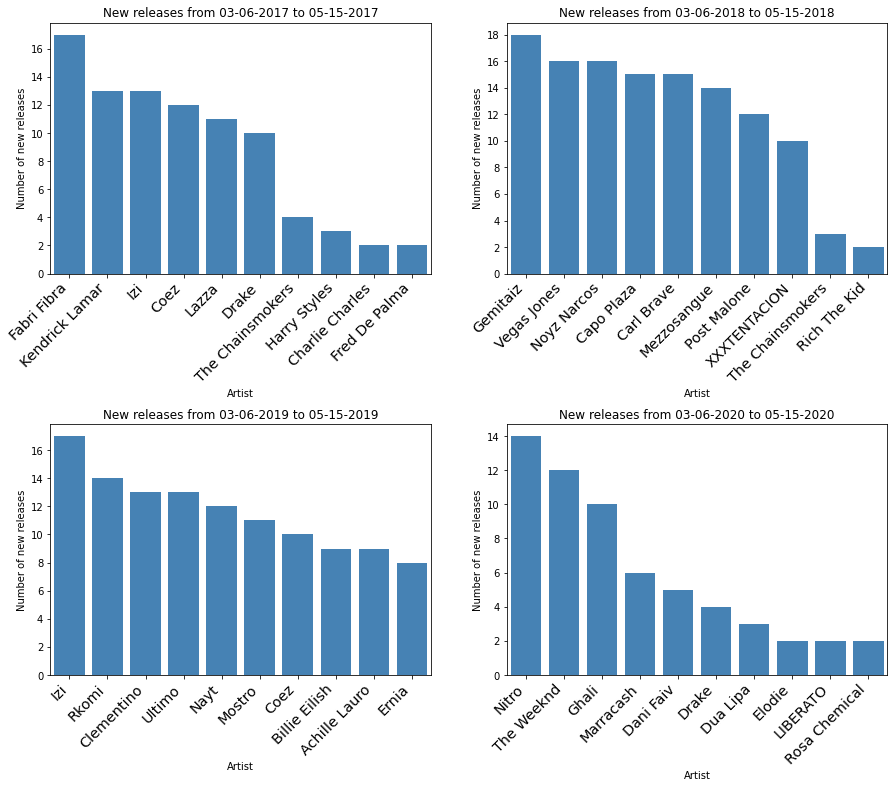

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

#Forse si può togliere qualche label

year_2017 = new_df.loc[new_df['year'] == 2017]
year_2018 = new_df.loc[new_df['year'] == 2018]
year_2019 = new_df.loc[new_df['year'] == 2019]
year_2020 = new_df.loc[new_df['year'] == 2020]


fig = plt.figure(figsize=(15,12))
gs0 = gridspec.GridSpec(2,2, figure=fig, hspace=0.6)

ax1 = fig.add_subplot(gs0[0,0])
ax2 = fig.add_subplot(gs0[0,1])
ax3 = fig.add_subplot(gs0[1,0])
ax4 = fig.add_subplot(gs0[1,1])

sns.barplot(x="Artist", y="new", data = year_2017.head(10), ax=ax1, color="steelblue", saturation=1)
ax1.set_xticklabels(
    ax1.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.set(xlabel='Artist', ylabel='Number of new releases', title='New releases from 03-06-2017 to 05-15-2017')

sns.barplot(x="Artist", y="new", data = year_2018.head(10), ax=ax2, color="steelblue", saturation=1)
ax2.set_xticklabels(
    ax2.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.set(xlabel='Artist', ylabel='Number of new releases', title='New releases from 03-06-2018 to 05-15-2018')

sns.barplot(x="Artist", y="new", data = year_2019.head(10), ax=ax3, color="steelblue", saturation=1)
ax3.set_xticklabels(
    ax3.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax3.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax3.set(xlabel='Artist', ylabel='Number of new releases', title='New releases from 03-06-2019 to 05-15-2019')

sns.barplot(x="Artist", y="new", data = year_2020.head(10), ax=ax4, color="steelblue", saturation=1)
ax4.set_xticklabels(
    ax4.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
ax4.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax4.set(xlabel='Artist', ylabel='Number of new releases', title='New releases from 03-06-2020 to 05-15-2020')

### Analyzing Marracash anomaly

If we analyze the file it_2020-03-27, we can notice 6 new releases by Marracash! <br>

We retrieve also the top 200 corresponding to the week of the release of the album, which is the **1st November 2019**.
In the second dataframe, we can notice 15 tracks from ***Marracash*** in the top 200, which basically are all the tracks from the album ***Persona***.

**The tracks are the following**:

1. Body Parts - I denti 
2. Qualcosa in cui credere - Lo scheletro (feat. Gué Pequeno) 
3. Quelli che non pensano - Il cervello (feat. Coez) 
4. Appartengo - Il sangue (feat. Massimo Pericolo) 
5. Poco di buono - Il fegato
6. Bravi a cadere - I polmoni 
7. Non sono Marra - La pelle (feat. Mahmood) 
8. Supreme - L'ego (feat. Tha Supreme, Sfera Ebbasta) 
9. Sport - I muscoli (feat. Luchè) 
10. Da buttare - Il ca**o 
11. Crudelia - I nervi 
12. G.O.A.T - Il cuore 
13. Madame - L'anima (feat. Madame) 
14. Tutto questo niente - Gli occhi 
15. Greta Thunberg - Lo stomaco (feat. Cosmo)

We can clearly notice that all the tracks contained in the first dataframe, except for ***SPORT + muscoli (RMX)*** are also present in the second dataframe, but they have different release dates and different IDs! 

**Why?**
We're going to discover this later.

First thing first, a track which is present in both dataframes and check if it's actually the same doing a query to the Spotify API. We're going to use ***SUPREME - L'Ego***

In [122]:
import os
import pandas as pd
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file_name = 'it_2020-03-27--2020-04-03.csv'
file = os.path.join(file_folder,file_name)
df=pd.read_csv(file)

df = df.filter(items=['Position', 'Track Name', 'Artist', 'ID', 'release date'])
df['new']=0


lower_date = file_name[3:13]
print(lower_date)
d0 = datetime.datetime.strptime(lower_date, date_format).date()
d1 = d0+datetime.timedelta(days=7)
for index, row in df.iterrows():
            date = row["release date"]
            try:
                date=datetime.datetime.strptime(date, '%Y-%m-%d').date()
                if d0 <= date < d1:
                    df.iloc[index, df.columns.get_loc('new')]= 1
            except ValueError:
                pass
df = df[df['Artist']== 'Marracash']
display(df)


path = os.getcwd()
file_folder = os.path.join(path,'it_features')
file_name = 'it_2019-11-01--2019-11-08.csv'
file = os.path.join(file_folder,file_name)
df=pd.read_csv(file)

df = df.filter(items=['Position', 'Track Name', 'Artist', 'ID', 'release date'])
df['new']=0


lower_date = file_name[3:13]
print(lower_date)
d0 = datetime.datetime.strptime(lower_date, date_format).date()
d1 = d0+datetime.timedelta(days=7)
for index, row in df.iterrows():
            date = row["release date"]
            try:
                date=datetime.datetime.strptime(date, '%Y-%m-%d').date()
                if d0 <= date < d1:
                    df.iloc[index, df.columns.get_loc('new')]= 1
            except ValueError:
                pass
df = df[df['Artist']== 'Marracash']
display(df)


2020-03-27


,Position,Track Name,Artist,ID,release date,new
2,3,"SPORT + muscoli (RMX) (feat. Lazza, Paky, Luch...",Marracash,7srDOLMwjMC07Dzs7mqCnv,2020-03-27,1
22,23,BRAVI A CADERE - I polmoni,Marracash,3me7fQdjgO8NHscb3xPaBa,2020-03-27,1
28,29,SUPREME - L'ego (feat. tha Supreme & Sfera Ebb...,Marracash,5EpBEqf5bnKeJ3p4zA1Sod,2020-03-27,1
33,34,NEON - Le Ali (feat. Elisa),Marracash,76cEI7LczlKZ1yLAHIoPBJ,2020-03-27,1
35,36,CRUDELIA - I nervi,Marracash,5dsz7MTrNdN9aMTrnp7sOG,2020-03-27,1
95,96,MADAME - L'anima (feat. Madame),Marracash,3go5ZuMoFTKl5ugai8nAKi,2020-03-27,1


2019-11-01


,Position,Track Name,Artist,ID,release date,new
0,1,SUPREME - L'ego (feat. tha Supreme & Sfera Ebb...,Marracash,020wG4EHTwBy5h2rbpxqvK,2019-10-31,0
1,2,CRUDELIA - I nervi,Marracash,1OeIJITrlUR4qss2kywMEn,2019-10-31,0
3,4,APPARTENGO - Il sangue (feat. Massimo Pericolo),Marracash,2tpfOljBdskx8G331TjRps,2019-10-31,0
4,5,QUELLI CHE NON PENSANO - Il cervello (feat. Coez),Marracash,6l1Jnqfu7GAOV4MDgA2bNP,2019-10-31,0
5,6,QUALCOSA IN CUI CREDERE - Lo scheletro (feat. ...,Marracash,39hRcGieqFaKfZ7LN91Vy5,2019-10-31,0
6,7,MADAME - L'anima (feat. Madame),Marracash,2wL96n9ToLGhekNTFrPhxj,2019-10-31,0
8,9,BRAVI A CADERE - I polmoni,Marracash,4SpV49wwekArulAVjEez3i,2019-10-31,0
9,10,SPORT - I muscoli (feat. Luchè),Marracash,3HVm4g9bZHo0aMsjzGS7Ro,2019-10-31,0
10,11,BODY PARTS - I denti,Marracash,4WOXQYfq3fYVRMcaXuHBAD,2019-10-31,0
11,12,NON SONO MARRA - La pelle (feat. Mahmood),Marracash,0pl6P6vTEB9pNABaD53SgS,2019-10-31,0


We can notice that the album is the same, and also all the artist infos are exactly the same! But there are 2 major differences:

1. Release date: the considered song in the first dataframe has release date **2020-03-27** while in the second dataframe has release date **2019-10-31** which is coherent with the offical release date of the album ***Persona***
2. Number of tracks: the considered album has 2 different number of tracks! **17** if we consider the ID song from the first dataframe and **15** if we consider the second dataframe.

From the previous points and dataframes, we can conclude that 2 tracks have been added later which are ***SPORT + muscoli (RMX)*** and ***NEON - Le Ali***, which are present in the first dataframe, but not in the official track list of the album ***Persona***. 

We discovered that adding extra tracks such as remixes, collaboration, featurings ecc... to an album, will automatically update the release date of all the tracks in the album! 

In fact, if you visit the following link which contains the album ***Persona***: https://open.spotify.com/album/19iZTn6IM82raMquk5Z7Ul where you can see the release date is 2019

While if you visit this link: https://open.spotify.com/album/3ZOt77e63uMgJXU7xcFpqu which contains the same album, but the release date is 2020. 

It is worth noticing that the same track from the 2 album versions has the same identical number of streams, this could give some hints about spotify music storage and format. It seems that the track is actually the same, but it has different ID and release date, and it's present in two different versions of the same album. 

In [19]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import requests
import json
import time
import pprint


credentials = SpotifyClientCredentials(client_id="6b8119b6cec94f538151d6bb7fd99acd", client_secret="bb3cc9f8fdb04ddb9516ab01c7bfc257")
token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)


first_dataframe_track = spotify.track('5EpBEqf5bnKeJ3p4zA1Sod')
print('-------------First result-------------')
print('Artist infos:')
pprint.pprint(first_dataframe_track['album']['artists'])
pprint.pprint('Album name: '+first_dataframe_track['album']['name'])
pprint.pprint('Release date: '+first_dataframe_track['album']['release_date'])
pprint.pprint('Album number of tracks: '+ str(first_dataframe_track['album']['total_tracks']))





second_dataframe_track = spotify.track('020wG4EHTwBy5h2rbpxqvK')
print('------------Second result-------------')
print('Artist infos:')
pprint.pprint(second_dataframe_track['album']['artists'])
pprint.pprint('Album name: '+second_dataframe_track['album']['name'])
pprint.pprint('Release date: '+second_dataframe_track['album']['release_date'])
pprint.pprint('Album number of tracks: '+ str(second_dataframe_track['album']['total_tracks']))

<ipython-input-19-ff8b711909fa>:13: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token = credentials.get_access_token()


-------------First result-------------
Artist infos:
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5AZuEF0feCXMkUCwQiQlW7'},
  'href': 'https://api.spotify.com/v1/artists/5AZuEF0feCXMkUCwQiQlW7',
  'id': '5AZuEF0feCXMkUCwQiQlW7',
  'name': 'Marracash',
  'type': 'artist',
  'uri': 'spotify:artist:5AZuEF0feCXMkUCwQiQlW7'}]
'Album name: Persona'
'Release date: 2020-03-27'
'Album number of tracks: 17'
------------Second result-------------
Artist infos:
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5AZuEF0feCXMkUCwQiQlW7'},
  'href': 'https://api.spotify.com/v1/artists/5AZuEF0feCXMkUCwQiQlW7',
  'id': '5AZuEF0feCXMkUCwQiQlW7',
  'name': 'Marracash',
  'type': 'artist',
  'uri': 'spotify:artist:5AZuEF0feCXMkUCwQiQlW7'}]
'Album name: Persona'
'Release date: 2019-10-31'
'Album number of tracks: 15'


### Going back to COVID releases analysis
The previous considerations hold also for ***Ghali***. He added two new songs to his ***DNA*** album released on the **21st February 2020**, which are ***Cacao*** and ***Hasta la vista***.

Everything we said so far gives us two important hints:
1. Artists probably add later tracks to their album to promote them for a longer period and refresh their release date in order to figure between new releases
2. Our estimate of the number of releases per period is in general an upward estimate of the real number of releases

Said that, ***Ghali*** and ***Marracash*** released only 2 and 3 new tracks in that period, which are remixes and/or featuring.

The only major album release by an italian artist have been ***GarbAge*** by ***Nitro***. We can conclude that the pandemic had a relevant impact on the work of artists, as we had already thought, and the lack of new releases impacted on the average number of streams on Spotify. 

**Remarks**: Our conclusion are based on the top 200 weekly, thus we can't conclude that the whole Spotify platform had a lower amount of active users/streams, and also that the overall number of releases by artists has decreased. We can only conclude that in the mainstream/commercial scene, there haven't been new releases by famous artists. 

In [21]:
#Code for showing single files and releases


from ipywidgets import VBox, Label, Dropdown, Output
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns

date_format = "%Y-%m-%d"
path = os.getcwd()
name_list=['None']
file_folder = os.path.join(path,'it_features')


for csv_file in os.listdir(file_folder): 
    #print(csv_file)
    name_list.append(csv_file)

#print(name_list)

def create_dataframe(file_folder, file_name):
    file = os.path.join(file_folder, file_name ) # Here I insert my filename
    test=pd.read_csv(file)
    test['new']=0

    lower_date = file_name[3:13]
    print(lower_date)
    d0 = datetime.datetime.strptime(lower_date, date_format).date()
    d1 = d0+datetime.timedelta(days=7)
    for index, row in test.iterrows():
                #print(index)
                date = row["release date"]
                #print(date)
                try:
                    date=datetime.datetime.strptime(date, '%Y-%m-%d').date()
                    if d0 <= date < d1:
                        #print('in between')
                        test.iloc[index, test.columns.get_loc('new')]= 1
                except ValueError:
                    #print('Incorrect format')
                    pass
    #with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        #display(test)            
    new_df = test.groupby(['Artist'], sort=True).sum().reset_index()
    new_df = new_df.sort_values(by = ['new'], ascending=[False])
    return [new_df, test]


def generate_plot(change):
    with output:
        output.clear_output() # reset the view
        if change["new"] != "None":
            #print(change['new'])
            returned_values= create_dataframe(file_folder, change['new'])
            data = returned_values[0]  # your custom code based on dropdown selection
            fig = plt.figure()
            g=sns.catplot(x="Artist", y="new", kind="bar", data=data.head(10))
            g.fig.set_figwidth(15)
            g.fig.set_figheight(8)
            plt.show(fig)
            top_10 = returned_values[1]
            top_10 = top_10.filter(items=['Position', 'Artist','Track Name','Streams','genre', 'release date', "new"])
            display(top_10.head(20))
    
    
desc = Label("Pick a .csv to plot:")

dropdown = Dropdown(
    options=name_list,
    value='None',
    disabled=False)

output = Output()

dropdown.observe(generate_plot, names="value")

VBox([desc, dropdown, output])

In [14]:
#avg streams during quarantine per state. Used in heatmap

import os
import pandas as pd
from IPython.display import display, HTML

path = os.getcwd()
file_folder = os.path.join(path,'it_features')
years = [2020]
states = ['it','es','gb','us','de','br']

list_data= []

for state in states:
    string = state + '_features'
    file_folder = os.path.join(path,string)
    for year in years:
        number_of_weeks = 0
        for csv_file in os.listdir(file_folder):
            if str(year) in csv_file[:13]:
                short_name = csv_file[:13]
                #print(csv_file[:13])
                csv_path = os.path.join(file_folder,csv_file)
                df_temp = pd.read_csv(csv_path)
                avg_streams = df_temp["Streams"].mean()
                #print(avg_streams)
                week = short_name[-2:]
                month =short_name[8:10]
                date = week + '-' + month

                #never append with a cycle to a dataframe. Create a list first and then convert to a dataframe https://stackoverflow.com/questions/10715965/add-one-row-to-pandas-dataframe
                temp = [avg_streams,date,year,number_of_weeks,state]
                list_data.append(temp)
                number_of_weeks=number_of_weeks+1
    #print(list_data)
            
df = pd.DataFrame(list_data,columns = ["avg_streams","date","year","number_of_weeks","state"])
lower_bound = 4
upper_bound = 30
df = df[(df['number_of_weeks'] >= lower_bound) & (df['number_of_weeks'] <= upper_bound)] #25


In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,avg_streams,date,year,number_of_weeks,state
4,595307.210,31-01,2020,4,it
5,712301.235,07-02,2020,5,it
6,643391.685,14-02,2020,6,it
7,616452.420,21-02,2020,7,it
8,605360.670,28-02,2020,8,it
9,549057.100,06-03,2020,9,it
10,482070.505,13-03,2020,10,it
11,458522.430,20-03,2020,11,it
12,487093.960,27-03,2020,12,it
13,465646.065,03-04,2020,13,it


In [16]:
#Other normalization

states=df['state'].unique()

for state in states:
    temp_df=df[(df['state'] == state)]
    #display(temp_df)
    mean_value = temp_df['avg_streams'].mean()
    std = temp_df['avg_streams'].std()
    
    temp_df['avg_streams']=temp_df['avg_streams'].subtract(mean_value)
    temp_df['avg_streams']=temp_df['avg_streams'].divide(std)

    
    #display(temp_df)
    df.loc[df['state'] == state, 'avg_streams'] = temp_df['avg_streams']


display(df)

<ipython-input-16-f7bac20bea9c>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-f7bac20bea9c>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,avg_streams,date,year,number_of_weeks,state
4,0.104011,31-01,2020,4,it
5,1.211951,07-02,2020,5,it
6,0.559374,14-02,2020,6,it
7,0.304257,21-02,2020,7,it
8,0.199218,28-02,2020,8,it
...,...,...,...,...,...
175,-0.938890,26-06,2020,25,br
176,-0.483821,03-07,2020,26,br
177,-0.083704,10-07,2020,27,br
178,0.165312,17-07,2020,28,br


[Text(0.5, 1.0, 'Streams trend')]

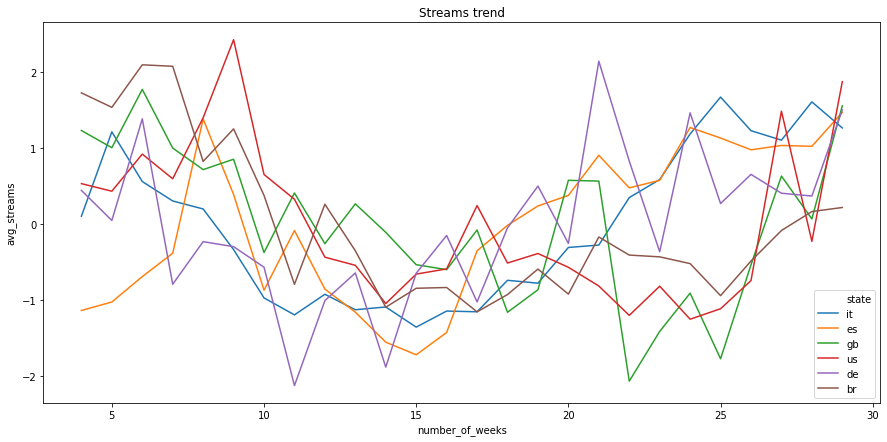

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

flatui = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

fig, ax = plt.subplots(figsize=(15, 7))    
plot=sns.lineplot(ax=ax,x="number_of_weeks", y="avg_streams", hue="state", data=df)

#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

plot.set(title='Streams trend')

['it' 'es' 'gb' 'us' 'de' 'br']
(6, 26)


AttributeError: 'AxesSubplot' object has no attribute 'fig'

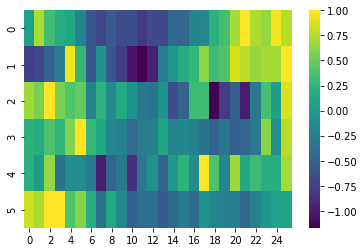

In [18]:
import numpy as np

array = df.filter(items=['avg_streams'])
array=array.to_numpy()
#print(array)
number=df['state'].unique()
print(number)
weeks = upper_bound - lower_bound
array=array.reshape(len(number),weeks)
print(array.shape)

for state in range(0,array.shape[0]):
    #print(state)
    #print(array[state,:])
    max_value = np.max(array[state,:])
    array[state,:] = np.divide(array[state,:],max_value)
    
    
    #print(max)
    
fig = plt.figure()
g=sns.heatmap(array, cmap='viridis')
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

In [ ]:
import os
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
path = os.getcwd()
file_folder = os.path.join(path,'it_features')
years = [2017,2018,2019,2020]
list_data= []
df = pd.DataFrame(list_data,columns = ["danceability","energy","loudness","tempo","valence","acousticness","date","year","number_of_weeks"])

for year in years:
    number_of_weeks = 0
    for csv_file in os.listdir(file_folder):
        if str(year) in csv_file[:13]:
            short_name = csv_file[:13]
            #print(csv_file[:13])
            csv_path = os.path.join(file_folder,csv_file)
            df_temp = pd.read_csv(csv_path)
            df_temp=df_temp.filter(["danceability","energy","loudness","tempo","valence", "acousticness"])
            #display(df_temp)
            #avg_streams = df_temp["Streams"].sum()
            #print(avg_streams)
            week = short_name[-2:]
            month =short_name[8:10]
            date = week + '-' + month
            temp = [date,year,number_of_weeks]
            df_temp['date'] = date
            df_temp['year'] = year
            df_temp['number_of_weeks'] = number_of_weeks
            #display(df_temp)
            frames = [df,df_temp]
            df = pd.concat(frames)
            number_of_weeks=number_of_weeks+1
#print(list_data)
            
            
            
            

            
    
    
    

In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

display(target_0)
#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['acousticness']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['acousticness']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['acousticness']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['acousticness']], hist=False, rug=False, norm_hist=True)



In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['danceability']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['danceability']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['danceability']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['danceability']], hist=False, rug=False, norm_hist=True)



In [ ]:
import plotly.figure_factory as ff
import numpy as np



# Group data together
hist_data = [target_0['danceability'], target_1['danceability'], target_2['danceability'], target_3['danceability']]

group_labels = ['2017', '2018', '2019', '2020']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.05, show_hist=False)
fig.show()

In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['energy']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['energy']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['energy']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['energy']], hist=False, rug=False, norm_hist=True)

In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['valence']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['valence']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['valence']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['valence']], hist=False, rug=False, norm_hist=True)

In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['tempo']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['tempo']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['tempo']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['tempo']], hist=False, rug=False, norm_hist=True)

In [ ]:
#Selecting data only in the period of quaantine. So from end of february to end of may

df = df[(df['number_of_weeks'] >= 10) & (df['number_of_weeks'] <= 20)]
df

In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['acousticness']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['acousticness']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['acousticness']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['acousticness']], hist=False, rug=False, norm_hist=True)



In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['danceability']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['danceability']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['danceability']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['danceability']], hist=False, rug=False, norm_hist=True)



In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['energy']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['energy']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['energy']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['energy']], hist=False, rug=False, norm_hist=True)

In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['valence']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['valence']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['valence']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['valence']], hist=False, rug=False, norm_hist=True)

In [ ]:
target_0 = df.loc[df['year'] == 2017]
target_1 = df.loc[df['year'] == 2018]
target_2 = df.loc[df['year'] == 2019]
target_3 = df.loc[df['year'] == 2020]

#target_0 = target_0.sample(frac=0.5, replace=False, random_state=1)

#print(target_0)
sns.distplot(target_0[['tempo']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_1[['tempo']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_2[['tempo']], hist=False, rug=False, norm_hist=True)
sns.distplot(target_3[['tempo']], hist=False, rug=False, norm_hist=True)

In [ ]:
import os
import pandas as pd
from IPython.display import display, HTML
import re

path = os.getcwd()
file_folder = os.path.join(path,'it_features')
years = [2017,2018,2019,2020]
list_data= []
for year in years:
    number_of_weeks = 0
    for csv_file in os.listdir(file_folder):
        if str(year) in csv_file[:13]:
            short_name = csv_file[:13]
            #print(csv_file[:13])
            csv_path = os.path.join(file_folder,csv_file)
            df_temp = pd.read_csv(csv_path)
            df_temp=df_temp[df_temp['genre'].str.match('Country')]
            #display(df_temp)
            avg_streams = df_temp["Streams"].mean()
            #print(avg_streams)
            week = short_name[-2:]
            month =short_name[8:10]
            date = week + '-' + month
            
            #never append with a cycle to a dataframe. Create a list first and then convert to a dataframe https://stackoverflow.com/questions/10715965/add-one-row-to-pandas-dataframe
            temp = [avg_streams,date,year,number_of_weeks]
            list_data.append(temp)
            number_of_weeks=number_of_weeks+1
#print(list_data)
            
df = pd.DataFrame(list_data,columns = ["avg_streams","date","year","number_of_weeks"])

            
            
            

            
    
    
    

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

# Trends for Europe nations in 2020 
We plot the streaming trend for each european nation taken into consideration and we try to find some patterns

In [ ]:
import os
import pandas as pd
from IPython.display import display, HTML

path = os.getcwd()
file_folder = os.path.join(path,'it_features')
years = [2020]
states = ['it','es','gb','us','de','br']

list_data= []

for state in states:
    string = state + '_features'
    file_folder = os.path.join(path,string)
    for year in years:
        number_of_weeks = 0
        for csv_file in os.listdir(file_folder):
            if str(year) in csv_file[:13]:
                short_name = csv_file[:13]
                #print(csv_file[:13])
                csv_path = os.path.join(file_folder,csv_file)
                df_temp = pd.read_csv(csv_path)
                avg_streams = df_temp["Streams"].mean()
                #print(avg_streams)
                week = short_name[-2:]
                month =short_name[8:10]
                date = week + '-' + month

                #never append with a cycle to a dataframe. Create a list first and then convert to a dataframe https://stackoverflow.com/questions/10715965/add-one-row-to-pandas-dataframe
                temp = [avg_streams,date,year,number_of_weeks,state]
                list_data.append(temp)
                number_of_weeks=number_of_weeks+1
    #print(list_data)
            
df = pd.DataFrame(list_data,columns = ["avg_streams","date","year","number_of_weeks","state"])
df = df[(df['number_of_weeks'] >= 4) & (df['number_of_weeks'] <= 21)]


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.line(df, x="number_of_weeks", y="avg_streams", color='state',  hover_name="date")
fig.show()

In [ ]:
import os
import pandas as pd
from IPython.display import display, HTML

path = os.getcwd()
file_folder = os.path.join(path,'gb_features')
years = [2017,2018,2019,2020]
list_data= []
for year in years:
    number_of_weeks = 0
    for csv_file in os.listdir(file_folder):
        if str(year) in csv_file[:13]:
            short_name = csv_file[:13]
            #print(csv_file[:13])
            csv_path = os.path.join(file_folder,csv_file)
            df_temp = pd.read_csv(csv_path)
            avg_streams = df_temp["Streams"].mean()
            #print(avg_streams)
            week = short_name[-2:]
            month =short_name[8:10]
            date = week + '-' + month
            
            #never append with a cycle to a dataframe. Create a list first and then convert to a dataframe https://stackoverflow.com/questions/10715965/add-one-row-to-pandas-dataframe
            temp = [avg_streams,date,year,number_of_weeks]
            list_data.append(temp)
            number_of_weeks=number_of_weeks+1
#print(list_data)
            
df = pd.DataFrame(list_data,columns = ["avg_streams","date","year","number_of_weeks"])
            
            
            

            
    
    
    

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.line(df, x="number_of_weeks", y="avg_streams", color='year',  hover_name="date")
fig.show()

In [ ]:
def extract_features(df, n_tracks = 50):
    dataframe = pd.DataFrame(columns=['id','danceability','energy','key','loudness','mode','speechiness',
                                     'acousticness','instrumentalness','liveness','valence','tempo','time_signature',
                                     'duration_ms'])
    for i in range(n_tracks):
        features = spotify.audio_features(str(df['ID'].iloc[i]))
        dataframe.loc[i] = [ features[0]['id'],
        features[0]['danceability'],
        features[0]['energy'],
        features[0]['key'],
        features[0]['loudness'],
        features[0]['mode'],
        features[0]['speechiness'],
        features[0]['acousticness'],
        features[0]['instrumentalness'],
        features[0]['liveness'],
        features[0]['valence'],
        features[0]['tempo'],
        features[0]['time_signature'],
        features[0]['duration_ms']]
    return dataframe

In [ ]:
#Maybe brexit in 2017. They started brexit negotiations. From the 4th of jly, end of lockdown, we have an increase in the number of streams

import pandas as pd
import spotipy
#from fycharts.SpotifyCharts import SpotifyCharts
from spotipy.oauth2 import SpotifyClientCredentials

credentials = SpotifyClientCredentials(client_id="6b8119b6cec94f538151d6bb7fd99acd", client_secret="bb3cc9f8fdb04ddb9516ab01c7bfc257")
token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)
result = spotify.track('5knuzwU65gJK7IF5yJsuaW')
features = spotify.audio_features('0DRKnh0BloxJHyhXkfbiX8')

print(features)
